# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Putri Rahayu Susmawati
- **Email:** prs993964@gmail.com
- **ID Dicoding:** putrirahayususmawati

## Menentukan Pertanyaan Bisnis

- Metode pembayaran mana yang paling sering digunakan oleh pelanggan?
- Apakah ada hubungan antara metode pembayaran dan status pesanan?
- Bagaimana rata-rata antara estimasi waktu pengiriman dan waktu aktual pengiriman dalam enam bulan terakhir?
- Bagaimana frekuensi pembelian pelanggan dalam dua tahun terakhir berhubungan dengan waktu pengiriman (dari persetujuan hingga diterima)?
- Apakah jenis pembayaran tertentu berpengaruh pada kecepatan pengiriman pesanan, dihitung dari tanggal persetujuan hingga diterima oleh pelanggan dalam satu tahun terakhir?
- Berapa persentase pesanan yang dikirim tepat waktu dalam setahun terakhir?
- Apakah ada perbedaan signifikan dalam nilai rata-rata pembayaran berdasarkan metode pembayaran?
- Bagaimana rata-rata waktu pengiriman dari tanggal persetujuan pesanan hingga pesanan diterima pelanggan?

## Import Semua Packages/Library yang Digunakan

Install Library

In [103]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Baca dataset

In [18]:
import pandas as pd
orders_df = pd.read_csv('orders_dataset.csv')
payments_df = pd.read_csv('order_payments_dataset.csv')

Menampilkan daftar kolom

In [ ]:
print(orders_df.columns)
print(payments_df.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


Menggabungkan dua DataFrame

In [ ]:
merged_df = pd.merge(orders_df, payments_df, on='order_id')
print(merged_df.head())


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp order_approved_at  \
0    delivered          10/2/2017 10:56   10/2/2017 11:07   
1    delivered          10/2/2017 10:56   10/2/2017 11:07   
2    delivered          10/2/2017 10:56   10/2/2017 11:07   
3    delivered          7/24/2018 20:41    7/26/2018 3:24   
4    delivered            8/8/2018 8:38     8/8/2018 8:55   

  order_delivered_carrier_date order_delivered_customer_date  \
0              10/4/2017 19:55              10/10/2017 21:25   
1              10/4/2017 19:55              10/10/2017 21:25   
2 

Memanipulasi dan menganalisis data transaksi berdasarkan bulan dan jenis pembayaran

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
merged_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah metode pembayaran per bulan
payment_trends = merged_df.groupby(['order_month', 'payment_type']).size().unstack()
print(payment_trends)


payment_type  boleto  credit_card  debit_card  not_defined  voucher
order_month                                                        
2016-09          NaN          4.0         NaN          NaN      NaN
2016-10         71.0        235.0         3.0          NaN     15.0
2016-12          NaN          1.0         NaN          NaN      NaN
2017-01        155.0        594.0         9.0          NaN     42.0
2017-02        343.0       1311.0        22.0          NaN    104.0
2017-03        510.0       2000.0        51.0          1.0    120.0
2017-04        443.0       1811.0        27.0          NaN    123.0
2017-05        727.0       2711.0        51.0          NaN    211.0
2017-06        598.0       2430.0        46.0          NaN    171.0
2017-07        766.0       2964.0        74.0          NaN    222.0
2017-08        852.0       3181.0        55.0          1.0    242.0
2017-09        823.0       3144.0        72.0          NaN    246.0
2017-10        860.0       3453.0        75.0   

Menghitung jumlah setiap metode pembayaran

In [ ]:
payment_counts = merged_df['payment_type'].value_counts()
print(payment_counts)


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


Menghitung rata-rata nilai pembayaran per status pesanan

In [ ]:
payment_by_status = merged_df.groupby('order_status')['payment_value'].mean()
print(payment_by_status)


order_status
approved       120.540000
canceled       215.746386
created        137.620000
delivered      153.067428
invoiced       212.732277
processing     217.536395
shipped        151.984528
unavailable    194.883683
Name: payment_value, dtype: float64


Melihat hubungan antara jenis pembayaran dan status pesanan

In [ ]:
status_by_payment = merged_df.pivot_table(index='payment_type', columns='order_status', aggfunc='size', fill_value=0)
print(status_by_payment)


order_status  approved  canceled  created  delivered  invoiced  processing  \
payment_type                                                                 
boleto               0        95        2      19191        67          70   
credit_card          2       444        3      74586       239         224   
debit_card           0         7        0       1486         6           2   
not_defined          0         3        0          0         0           0   
voucher              0       115        0       5493        13          23   

order_status  shipped  unavailable  
payment_type                        
boleto            209          150  
credit_card       851          446  
debit_card         22            6  
not_defined         0            0  
voucher            84           47  


**Insight:**
- berdasarkan hasil analisis diatas dapat disimpulkan bahwa metode pembayaran yang palig sering digunakan adalah credit card
- Pesanan dengan nilai pembayaran lebih tinggi cenderung mengalami lebih banyak masalah atau penundaan, terbukti dari nilai rata-rata yang lebih tinggi pada pesanan yang canceled, processing, atau dalam tahap invoiced.
- Credit Card memiliki jumlah pesanan yang jauh lebih besar (lebih dari 74.000 yang berhasil dikirim), tetapi juga memiliki tingkat pembatalan yang relatif tinggi (444 pesanan dibatalkan).

### Assessing Data

Mengidentifikasi missing value

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')
payments_df = pd.read_csv('order_payments_dataset.csv')

missing_orders = orders_df.isnull().sum()
missing_payments = payments_df.isnull().sum()

print("Missing values in orders dataset:")
print(missing_orders)

print("\nMissing values in payments dataset:")
print(missing_payments)


Missing values in orders dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing values in payments dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


**Insight:**

Terdapat Missing value pada order dataset di 3 kolom yakni order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date sedangkan pada payments dataset tidak terdapat adanya Missing value.

Mengidentifikasi data duplikat

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')
payments_df = pd.read_csv('order_payments_dataset.csv')

# Mencari duplikat pada orders dataset berdasarkan kolom order_id
duplicate_orders = orders_df[orders_df.duplicated(subset=['order_id'], keep=False)]

# Mencari duplikat pada payments dataset berdasarkan kolom order_id
duplicate_payments = payments_df[payments_df.duplicated(subset=['order_id'], keep=False)]

# Menampilkan hasil duplikat
print("Duplicate entries in orders dataset:")
print(duplicate_orders)

print("\nDuplicate entries in payments dataset:")
print(duplicate_payments)


Duplicate entries in orders dataset:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []

Duplicate entries in payments dataset:
                                order_id  payment_sequential payment_type  \
25      5cfd514482e22bc992e7693f0e3e8df7                   2      voucher   
35      b2bb080b6bc860118a246fd9b6fad6da                   1  credit_card   
75      3689194c14ad4e2e7361ebd1df0e77b0                   2      voucher   
84      723e462ce1ee50e024887c0b403130f3                   1  credit_card   
102     21b8b46679ea6482cbf911d960490048                   2      voucher   
...                                  ...                 ...          ...   
103778  fd86c80924b4be8fb7f58c4ecc680dae                   1  credit_card   
103817  6d4616de4341417e17978fe57aec1c46                   1  credit_card   
103860  31bc09fdbd70

**Insight:**

pada order dataset tidak terdapat data duplicate namun pada payments dataset terdapat duplicate sebanyak 7407 baris data dengan 5 kolom

Mengidentifikasi outlier pada dataset order_payments_dataset.csv

In [ ]:
# mengidentifikasi outlier menggunakan IQR method
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga) untuk kolom payment_value
Q1 = payments_df['payment_value'].quantile(0.25)
Q3 = payments_df['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menetapkan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan nilai yang berada di luar batas (outliers)
outliers_payments = payments_df[(payments_df['payment_value'] < lower_bound) |
                                (payments_df['payment_value'] > upper_bound)]

print("Outliers in payment_value:")
print(outliers_payments)


Outliers in payment_value:
                                order_id  payment_sequential payment_type  \
23      4d680edbaa7d3d9bed69532957368a03                   1  credit_card   
26      d0a945f85ba1074b60aac97ade7e240e                   1  credit_card   
52      2e2c60b99754ae1e4d8b18846cfec9f2                   1  credit_card   
54      95442deb81a5d91c97c0df96b431634a                   1       boleto   
61      3ab4eea6776259ae8dfbabaeffece352                   1  credit_card   
...                                  ...                 ...          ...   
103814  df8ab61cb615d551483618533aceb364                   1  credit_card   
103843  262bf694d9c87de7844dd80b98fcfef3                   1  credit_card   
103861  691688405bcee3ff9023639514498962                   1  credit_card   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   

        payment_installments  payment_value  
23

**Insight:**

Terdapat 7981 baris yang dianggap sebagai outliers berdasarkan metode IQR pada kolom payment_value dalam payments dataset

Mengidentifikasi outlier pada dataset orders_dataset.csv

In [ ]:
# mengidentifikasi outlier menggunakan IQR method
# Mengkonversi kolom waktu ke datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Menghitung selisih hari antara waktu pembelian dan pengiriman
orders_df['delivery_duration'] = (orders_df['order_delivered_customer_date'] -
                                  orders_df['order_purchase_timestamp']).dt.days

# Mendeteksi outlier pada kolom delivery_duration
Q3 = orders_df['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Menetapkan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan nilai outliers
outliers_orders = orders_df[(orders_df['delivery_duration'] < lower_bound) |
                            (orders_df['delivery_duration'] > upper_bound)]

print("Outliers in delivery duration:")
print(outliers_orders[['order_id', 'delivery_duration']])


Outliers in delivery duration:
                               order_id  delivery_duration
29     ecab90c9933c58908d3d6add7c6f5ae3               30.0
35     8563039e855156e48fccee4d611a3196               30.0
41     6ea2f835b4556291ffdc53fa0b3b95e8               33.0
97     6a0a8bfbbe700284feb0845d95e0867f               36.0
110    9d531c565e28c3e0d756192f84d8731f               56.0
...                                 ...                ...
99130  85a543ebc5aa8bcbbf7974c03ed49ca2               29.0
99266  76a948cd55bf22799753720d4545dd2d               47.0
99279  4cf09d9e5ebbe0f91ddd7bf9aae891cd               32.0
99423  38e9133ce29f6bbe35aed9c3863dce01               39.0
99432  cfa78b997e329a5295b4ee6972c02979               37.0

[5025 rows x 2 columns]


**Insight:**

Terdapat 5025 baris yang dianggap sebagai outliers berdasarkan metode IQR pada kolom order_delivered_customer_date dalam orders dataset

**Keseluruhan Insight:**
- Terdapat Missing value pada order dataset di 3 kolom yakni order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date sedangkan pada payments dataset tidak terdapat adanya Missing value.
- Pada order dataset tidak terdapat data duplicate namun pada payments dataset terdapat duplicate sebanyak 7407 baris data dengan 5 kolom
- Terdapat 7981 baris yang dianggap sebagai outliers berdasarkan metode IQR pada kolom payment_value dalam payments dataset
- Terdapat 5025 baris yang dianggap sebagai outliers berdasarkan metode IQR pada kolom order_delivered_customer_date dalam orders dataset

### Cleaning Data

Memeriksa contoh data secara acak dengan menampilkan 5 baris secara acak

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')

# Menampilkan 5 baris acak dari orders_df
print(orders_df.sample(5))

payments_df = pd.read_csv('order_payments_dataset.csv')

# Menampilkan 5 baris acak dari payments_df
print(payments_df.sample(5))

                               order_id                       customer_id  \
77778  7a16d8eadd3c788ef0386c78218da6cc  82df80d0b10227cfb73163fe5c9a30f5   
66294  632f22d24375715fbfa8c0ae2e5d35b7  f8b67d327058afa39382991d7173b1d7   
59483  3ba7bbd7b7686df219611578ece6918c  f3dfadecc341dcdcb6c252a55192041c   
66877  194f1c2a129a89001a71ac255d239fff  97145de82c0f89ea30b3ca169795459f   
85752  ba7517020cc8cdda51bffbd30bb1b781  ff9fb29b08ea8f4564e23dac02a225fa   

      order_status order_purchase_timestamp order_approved_at  \
77778    delivered          10/2/2017 16:37    10/4/2017 2:49   
66294    delivered           5/1/2018 18:06    5/1/2018 18:15   
59483    delivered           6/23/2018 8:11    6/23/2018 8:35   
66877    delivered          6/17/2018 22:21   6/17/2018 22:32   
85752    delivered           7/3/2018 12:58    7/5/2018 16:21   

      order_delivered_carrier_date order_delivered_customer_date  \
77778              10/4/2017 19:49              10/10/2017 19:52   
66294     

Melihat adanya missing value

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')
payments_df = pd.read_csv('order_payments_dataset.csv')

missing_orders = orders_df.isnull().sum()
missing_payments = payments_df.isnull().sum()

print("Missing values in orders dataset:")
print(missing_orders)

print("\nMissing values in payments dataset:")
print(missing_payments)

Missing values in orders dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing values in payments dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Menghapus missing value

In [ ]:
# Menghapus baris yang memiliki missing values
orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

# Cek ulang apakah missing values telah dihapus
print(orders_df.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [ ]:
# Memastikan dataset asli tersimpan dengan perubahan
orders_df_clean = orders_df.copy()

# Cek ulang hasilnya
print(orders_df_clean.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Melihat adanya duplikat

In [ ]:
# Menampilkan baris duplikat berdasarkan seluruh kolom
duplicates_orders = orders_df[orders_df.duplicated()]
duplicates_payments = payments_df[payments_df.duplicated()]

# Menampilkan duplikat di dataset orders
print("Duplicate rows in orders dataset:")
print(duplicates_orders)

# Menampilkan duplikat di dataset payments
print("Duplicate rows in payments dataset:")
print(duplicates_payments)


Duplicate rows in orders dataset:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []
Duplicate rows in payments dataset:
Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []


Menghapus Outlier

In [ ]:
import pandas as pd

file_path_orders = 'orders_dataset.csv'
file_path_payments = 'order_payments_dataset.csv'

try:
    orders_df = pd.read_csv(file_path_orders)
    payments_df = pd.read_csv(file_path_payments)
    print("Files loaded successfully.")

    def remove_outliers(df, column_name):
        # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Menetapkan batas bawah dan atas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter untuk menghapus data yang merupakan outlier
        df_clean = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
        return df_clean

    # Hapus outlier pada payments_df berdasarkan kolom 'payment_value'
    payments_df_clean = remove_outliers(payments_df, 'payment_value')
    print("Dataset payments setelah menghapus outliers pada 'payment_value':")
    print(payments_df_clean)


    orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')
    orders_df['order_purchase_timestamp'] = orders_df['order_purchase_timestamp'].astype('int64', errors='ignore') // 1e9  
    
    orders_df_clean = remove_outliers(orders_df, 'order_purchase_timestamp')
    print("Dataset orders setelah menghapus outliers pada 'order_purchase_timestamp':")
    print(orders_df_clean)

except FileNotFoundError:
    print("Error: One or both of the files were not found in /content directory.")


Files loaded successfully.
Dataset payments setelah menghapus outliers pada 'payment_value':
                                order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103879  c45067032fd84f4cf408730ff5205568                   1  credit_card   
103880  7159096c5aa9be77f7f0c26c01ee9793                   1  credit_card   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1

Statistik deskriptif 'payment_value' setelah pembersihan:
count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

Statistik deskriptif 'order_purchase_timestamp' setelah pembersihan:
count    9.943700e+04
mean     1.514711e+09
std      1.327471e+07
min      1.475446e+09
25%      1.505230e+09
50%      1.516317e+09
75%      1.525449e+09
max      1.539797e+09
Name: order_purchase_timestamp, dtype: float64

Outliers tersisa pada 'payment_value':
                                order_id  payment_sequential payment_type  \
8       1f78449c87a54faf9e96e88ba1491fa9                   1  credit_card   
24      8cd68144cdb62dc0d60848cf8616d2a4                   1       boleto   
87      198298d54f269d8c5fe89e85a859af61                   1  credit_card   
177     b545ba7b0bd67a3128185c7214704319                   1  credit_card   
230     251d

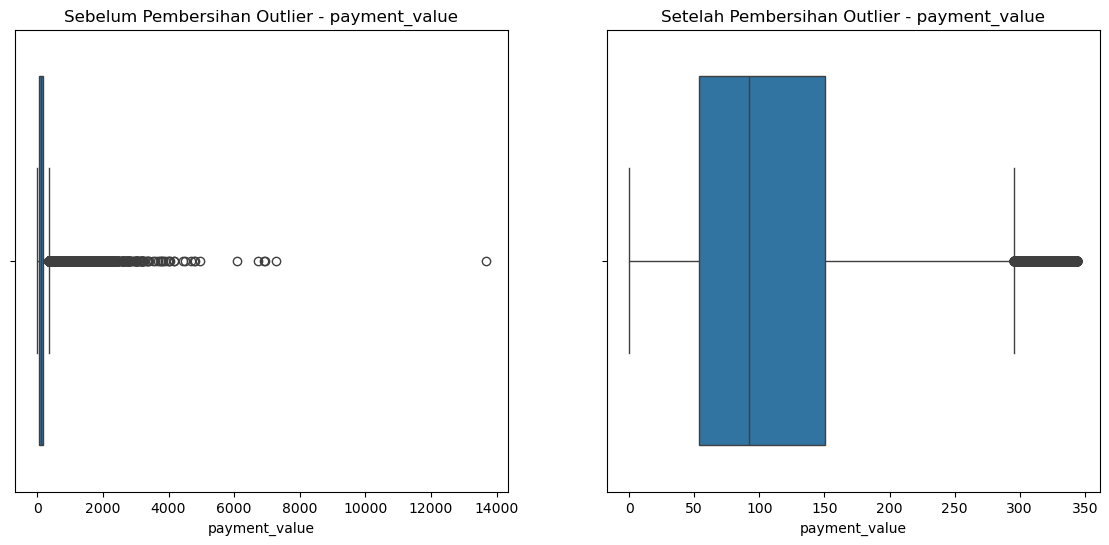

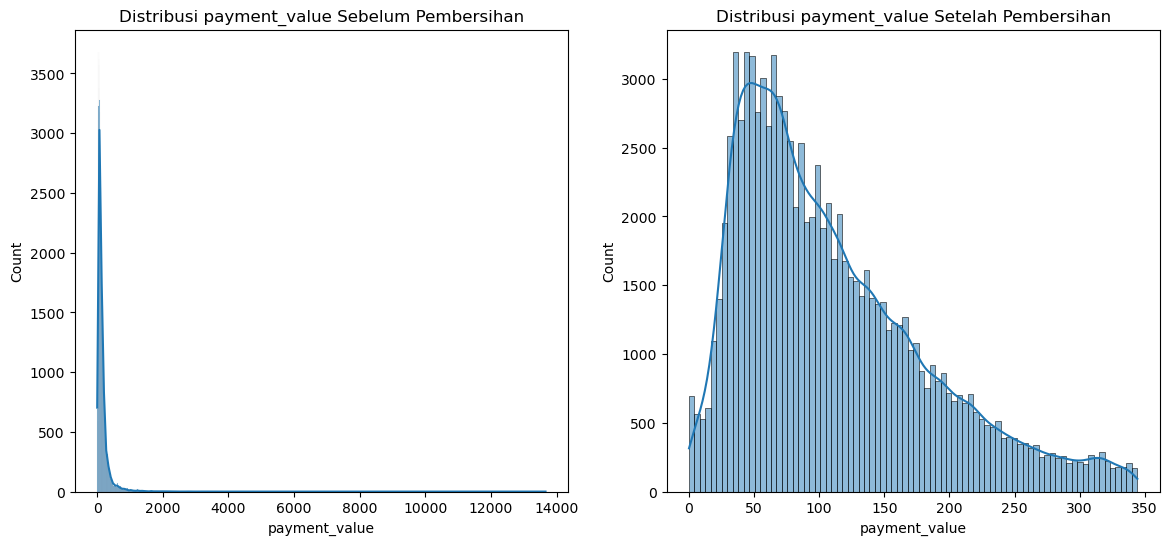

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Statistik deskriptif 'payment_value' setelah pembersihan:")
print(payments_df_clean['payment_value'].describe())

print("\nStatistik deskriptif 'order_purchase_timestamp' setelah pembersihan:")
print(orders_df_clean['order_purchase_timestamp'].describe())

# Cek ulang outlier untuk memastikan data sudah bersih
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

# Cek apakah ada outlier yang tersisa pada 'payment_value' dan 'order_purchase_timestamp'
remaining_outliers_payments = detect_outliers(payments_df_clean, 'payment_value')
remaining_outliers_orders = detect_outliers(orders_df_clean, 'order_purchase_timestamp')

print("\nOutliers tersisa pada 'payment_value':")
print(remaining_outliers_payments)

print("\nOutliers tersisa pada 'order_purchase_timestamp':")
print(remaining_outliers_orders)

# Visualisasi data sebelum dan sesudah pembersihan outlier
plt.figure(figsize=(14, 6))

# Boxplot untuk kolom 'payment_value' sebelum dan sesudah pembersihan
plt.subplot(1, 2, 1)
sns.boxplot(x=payments_df['payment_value'])
plt.title("Sebelum Pembersihan Outlier - payment_value")

plt.subplot(1, 2, 2)
sns.boxplot(x=payments_df_clean['payment_value'])
plt.title("Setelah Pembersihan Outlier - payment_value")

plt.show()

# Plot tambahan untuk kolom 'order_purchase_timestamp'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(payments_df['payment_value'], kde=True)
plt.title("Distribusi payment_value Sebelum Pembersihan")

plt.subplot(1, 2, 2)
sns.histplot(payments_df_clean['payment_value'], kde=True)
plt.title("Distribusi payment_value Setelah Pembersihan")

plt.show()


In [ ]:
# Hapus outlier yang masih tersisa pada kolom 'payment_value' di payments_df_clean
payments_df_final = payments_df_clean[~payments_df_clean.index.isin(remaining_outliers_payments.index)]

# Tampilkan ukuran data setelah pembersihan akhir
print("Data setelah menghapus outliers akhir:")
print(payments_df_final.shape)


Data setelah menghapus outliers akhir:
(93388, 5)


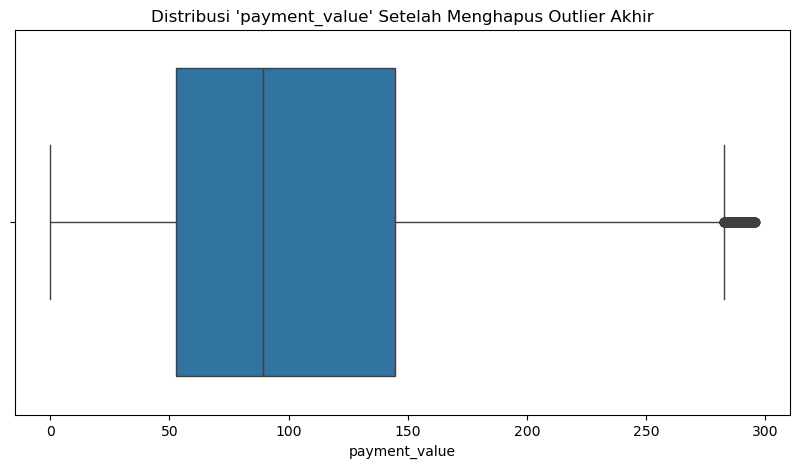

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk payment_value setelah pembersihan akhir
plt.figure(figsize=(10, 5))
sns.boxplot(x=payments_df_final['payment_value'])
plt.title("Distribusi 'payment_value' Setelah Menghapus Outlier Akhir")
plt.show()


In [ ]:
# Menyimpan dataset yang sudah dibersihkan
payments_df_final.to_csv("payments_df_cleaned.csv", index=False)
print("Data sudah disimpan sebagai 'payments_df_cleaned.csv'")


Data sudah disimpan sebagai 'payments_df_cleaned.csv'


Melihat adanya duplikat

In [ ]:
import pandas as pd

payments_df = pd.read_csv('payments_df_cleaned.csv')

# Mencari duplikat pada payments dataset berdasarkan kolom order_id
duplicate_payments = payments_df[payments_df.duplicated(subset=['order_id'], keep=False)]

print("\nDuplicate entries in payments dataset:")
print(duplicate_payments)


Duplicate entries in payments dataset:
                               order_id  payment_sequential payment_type  \
31     b2bb080b6bc860118a246fd9b6fad6da                   1  credit_card   
66     3689194c14ad4e2e7361ebd1df0e77b0                   2      voucher   
75     723e462ce1ee50e024887c0b403130f3                   1  credit_card   
92     21b8b46679ea6482cbf911d960490048                   2      voucher   
111    ea9184ad433a404df1d72fa0a8764232                   4      voucher   
...                                 ...                 ...          ...   
93291  fd86c80924b4be8fb7f58c4ecc680dae                   1  credit_card   
93325  6d4616de4341417e17978fe57aec1c46                   1  credit_card   
93365  31bc09fdbd701a7a4f9b55b5955b8687                   6      voucher   
93373  c9b01bef18eb84888f0fd071b8413b38                   1  credit_card   
93378  d41f1036712e18ee525939d08b7a1c98                   1  credit_card   

       payment_installments  payment_value  
31

In [ ]:
# Melihat jumlah baris sebelum menghapus duplikat
print("Jumlah baris sebelum menghapus duplikat:", payments_df.shape[0])

# Menghapus data duplikat berdasarkan semua kolom
payments_df_clean = payments_df.drop_duplicates()

# Melihat jumlah baris setelah menghapus duplikat
print("Jumlah baris setelah menghapus duplikat:", payments_df_clean.shape[0])

# Mengecek apakah masih ada duplikat
duplicates_remaining = payments_df_clean.duplicated().sum()
print("Jumlah duplikat yang tersisa setelah pembersihan:", duplicates_remaining)


Jumlah baris sebelum menghapus duplikat: 93388
Jumlah baris setelah menghapus duplikat: 93388
Jumlah duplikat yang tersisa setelah pembersihan: 0


In [ ]:
# Mengecek ulang duplikat setelah pembersihan
duplicates_remaining = payments_df_clean.duplicated().sum()

# Menampilkan hasil
if duplicates_remaining > 0:
    print(f"Masih terdapat {duplicates_remaining} duplikat yang tersisa dalam dataset.")
else:
    print("Tidak ada duplikat yang tersisa dalam dataset.")


Tidak ada duplikat yang tersisa dalam dataset.


In [ ]:
# Menyimpan dataset payments_df_clean yang sudah bersih
payments_df_clean.to_csv("payments_df_cleaned.csv", index=False)
print("Dataset yang sudah bersih telah disimpan sebagai 'payments_df_cleaned.csv'")


Dataset yang sudah bersih telah disimpan sebagai 'payments_df_cleaned.csv'


In [ ]:
import pandas as pd

payments_df_cleaned = pd.read_csv("payments_df_cleaned.csv")

# Cek duplikat
duplicates = payments_df_cleaned.duplicated().sum()
if duplicates > 0:
    print(f"Masih terdapat {duplicates} duplikat dalam dataset.")
else:
    print("Tidak ada duplikat yang tersisa dalam dataset.")

# Cek missing values
missing_values = payments_df_cleaned.isnull().sum()
print("\nJumlah missing values per kolom:")
print(missing_values[missing_values > 0])  # Menampilkan kolom yang memiliki missing values saja

# Cek outliers di kolom 'payment_value' menggunakan metode IQR
Q1 = payments_df_cleaned['payment_value'].quantile(0.25)
Q3 = payments_df_cleaned['payment_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = payments_df_cleaned[(payments_df_cleaned['payment_value'] < lower_bound) |
                               (payments_df_cleaned['payment_value'] > upper_bound)]

print(f"\nJumlah outliers pada 'payment_value': {len(outliers)}")


Tidak ada duplikat yang tersisa dalam dataset.

Jumlah missing values per kolom:
Series([], dtype: int64)

Jumlah outliers pada 'payment_value': 740


In [ ]:
# Menghitung Q1 dan Q3 untuk kolom payment_value
Q1 = payments_df_cleaned['payment_value'].quantile(0.25)
Q3 = payments_df_cleaned['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menetapkan batas bawah dan atas untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers di luar batas IQR
payments_df_no_outliers = payments_df_cleaned[(payments_df_cleaned['payment_value'] >= lower_bound) &
                                              (payments_df_cleaned['payment_value'] <= upper_bound)]

# Melihat jumlah baris setelah pembersihan
print(f"Jumlah data setelah menghapus outliers: {payments_df_no_outliers.shape[0]}")

# Menyimpan ulang data yang sudah bebas dari outliers
payments_df_no_outliers.to_csv("payments_df_no_outliers.csv", index=False)
print("Dataset yang sudah bersih dari outliers telah disimpan sebagai 'payments_df_no_outliers.csv'")


Jumlah data setelah menghapus outliers: 92648
Dataset yang sudah bersih dari outliers telah disimpan sebagai 'payments_df_no_outliers.csv'


In [ ]:
import pandas as pd

payments_df_no_outliers = pd.read_csv('payments_df_no_outliers.csv')

print(payments_df_no_outliers.head())



                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [ ]:
# Hitung Q1 dan Q3 untuk kolom payment_value
Q1 = payments_df_no_outliers['payment_value'].quantile(0.25)
Q3 = payments_df_no_outliers['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Tetapkan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cari outlier yang berada di luar batas IQR
outliers = payments_df_no_outliers[(payments_df_no_outliers['payment_value'] < lower_bound) |
                                   (payments_df_no_outliers['payment_value'] > upper_bound)]

# Menampilkan jumlah outliers yang tersisa
print(f"Jumlah outliers pada 'payment_value' setelah pembersihan: {len(outliers)}")

if not outliers.empty:
    print(outliers.head())


Jumlah outliers pada 'payment_value' setelah pembersihan: 222
                              order_id  payment_sequential payment_type  \
332   817e8b5495d2b31da82dfe5a89aacdba                   1  credit_card   
410   189ede25eb8522abcbd3592d08811f85                   1       boleto   
456   6eab6f37ff2d390d23be84642739b500                   1  credit_card   
926   916be5eed428af45e462f039ef65ca24                   1  credit_card   
1278  13359bb817972f7492a922fa64a69cad                   1  credit_card   

      payment_installments  payment_value  
332                      8         281.50  
410                      1         280.08  
456                      5         279.40  
926                      2         281.73  
1278                     1         279.30  


In [ ]:
import pandas as pd

payments_df_no_outliers = pd.read_csv('payments_df_no_outliers.csv')

# Menghitung Q1 dan Q3 untuk kolom 'payment_value'
Q1 = payments_df_no_outliers['payment_value'].quantile(0.25)
Q3 = payments_df_no_outliers['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menggunakan faktor 2.0 untuk menetapkan batas bawah dan atas
lower_bound = Q1 - 2.0 * IQR
upper_bound = Q3 + 2.0 * IQR

# Mendeteksi outliers
outliers = payments_df_no_outliers[(payments_df_no_outliers['payment_value'] < lower_bound) |
                                   (payments_df_no_outliers['payment_value'] > upper_bound)]

# Menampilkan jumlah outliers 
print(f"\nJumlah outliers pada 'payment_value' setelah re-evaluasi dengan threshold 2.0: {len(outliers)}")

if not outliers.empty:
    print(outliers.head())

# Menghapus outliers di luar batas IQR yang baru
payments_df_less_outliers = payments_df_no_outliers[(payments_df_no_outliers['payment_value'] >= lower_bound) &
                                                    (payments_df_no_outliers['payment_value'] <= upper_bound)]

# Melihat jumlah data setelah menghapus outliers
print(f"\nJumlah data setelah menghapus outliers dengan threshold 2.0: {payments_df_less_outliers.shape[0]}")

# Menyimpan ulang data yang sudah bersih dari outliers 
payments_df_less_outliers.to_csv("payments_df_less_outliers.csv", index=False)
print("Dataset yang sudah dibersihkan lebih lanjut disimpan sebagai 'payments_df_less_outliers.csv'.")



Jumlah outliers pada 'payment_value' setelah re-evaluasi dengan threshold 2.0: 0

Jumlah data setelah menghapus outliers dengan threshold 2.0: 92648
Dataset yang sudah dibersihkan lebih lanjut disimpan sebagai 'payments_df_less_outliers.csv'.


In [ ]:
import pandas as pd

payments_df_less_outliers = pd.read_csv('payments_df_less_outliers.csv')

# Menghitung Q1 dan Q3 untuk kolom 'payment_value'
Q1 = payments_df_less_outliers['payment_value'].quantile(0.25)
Q3 = payments_df_less_outliers['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menggunakan faktor 2.0 untuk menetapkan batas bawah dan atas
lower_bound = Q1 - 2.0 * IQR
upper_bound = Q3 + 2.0 * IQR

# Mendeteksi outliers
outliers_after_recheck = payments_df_less_outliers[(payments_df_less_outliers['payment_value'] < lower_bound) |
                                                   (payments_df_less_outliers['payment_value'] > upper_bound)]

# Menampilkan jumlah outliers setelah evaluasi
print(f"\nJumlah outliers pada 'payment_value' setelah re-evaluasi dengan threshold 2.0: {len(outliers_after_recheck)}")

if not outliers_after_recheck.empty:
    print(outliers_after_recheck.head())



Jumlah outliers pada 'payment_value' setelah re-evaluasi dengan threshold 2.0: 0


In [ ]:
import pandas as pd

payments_df = pd.read_csv('payments_df_less_outliers.csv')

missing_payments = payments_df.isnull().sum()

print("\nMissing values in payments dataset:")
print(missing_payments)


Missing values in payments dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
import pandas as pd

data = pd.read_csv('payments_df_less_outliers.csv')

# Mencari duplicate
duplicate_rows = data[data.duplicated()]

# Menampilkan duplicate
print(duplicate_rows)


Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []


Menghapus duplikat

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_dataset.csv')

# Menghapus baris dengan missing values pada orders_df
orders_df_cleaned = orders_df.dropna()

# Melihat jumlah baris dan kolom setelah menghapus missing values
print(f"Jumlah data setelah menghapus missing values: {orders_df_cleaned.shape}")

# Menyimpan dataset yang sudah bersih
orders_df_cleaned.to_csv("orders_df_cleaned.csv", index=False)
print("Dataset yang sudah bersih dari missing values telah disimpan sebagai 'orders_df_cleaned.csv'")

Jumlah data setelah menghapus missing values: (96461, 8)
Dataset yang sudah bersih dari missing values telah disimpan sebagai 'orders_df_cleaned.csv'


In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_df_cleaned.csv')

# Mencari duplikat pada orders dataset berdasarkan kolom order_id
duplicate_orders = orders_df[orders_df.duplicated(subset=['order_id'], keep=False)]

# Menampilkan hasil duplikat
print("Duplicate entries in orders dataset:")
print(duplicate_orders)


Duplicate entries in orders dataset:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders_df_cleaned.csv')

missing_orders = orders_df.isnull().sum()

print("Missing values in orders dataset:")
print(missing_orders)

Missing values in orders dataset:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [ ]:
import pandas as pd

orders_df_cleaned = pd.read_csv('orders_df_cleaned.csv')

orders_df_cleaned['order_purchase_timestamp'] = pd.to_datetime(orders_df_cleaned['order_purchase_timestamp'])
orders_df_cleaned['order_approved_at'] = pd.to_datetime(orders_df_cleaned['order_approved_at'])
orders_df_cleaned['order_delivered_carrier_date'] = pd.to_datetime(orders_df_cleaned['order_delivered_carrier_date'])
orders_df_cleaned['order_delivered_customer_date'] = pd.to_datetime(orders_df_cleaned['order_delivered_customer_date'])
orders_df_cleaned['order_estimated_delivery_date'] = pd.to_datetime(orders_df_cleaned['order_estimated_delivery_date'])


orders_df_cleaned['delivery_duration'] = (orders_df_cleaned['order_delivered_customer_date'] - orders_df_cleaned['order_purchase_timestamp']).dt.days

Q1 = orders_df_cleaned['delivery_duration'].quantile(0.25)
Q3 = orders_df_cleaned['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Menetapkan batas bawah dan atas untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data untuk menghapus outliers
orders_df_no_outliers = orders_df_cleaned[(orders_df_cleaned['delivery_duration'] >= lower_bound) &
                                          (orders_df_cleaned['delivery_duration'] <= upper_bound)]

# Mengecek jumlah baris setelah pembersihan
print(f"Jumlah data setelah menghapus outliers: {orders_df_no_outliers.shape}")

# Menyimpan dataset yang sudah bersih dari outliers
orders_df_no_outliers.to_csv("orders_df_no_outliers.csv", index=False)
print("Dataset yang sudah bersih dari outliers telah disimpan sebagai 'orders_df_no_outliers.csv'")


Jumlah data setelah menghapus outliers: (91436, 9)
Dataset yang sudah bersih dari outliers telah disimpan sebagai 'orders_df_no_outliers.csv'


**Insight:**
- menghapus missing value pada dataset orders_dataset di kolom order_approved_at sebanyak 160 baris, order_delivered_carrier_date sebanyak 1783 baris dan order_delivered_customer_date sebanyak 2965 baris
- dataset order_payments_dataset berhasil dibersihkan dan simpan di payments_df_less_outliers.csv
- dataset orders_dataset.csv berhasil dibersihkan dan simpan di orders_df_no_outliers.csv

## Exploratory Data Analysis (EDA)

### Explore ...

Menggabungkan dua DataFrame

In [ ]:
import pandas as pd

all_df = pd.merge(orders_df, payments_df, on='order_id', how='inner')

all_df.to_csv("all_data.csv", index=False)

Identifikasi metode pembayaran yang sering digunakan

In [ ]:

payment_type_counts_sorted = data['payment_type'].value_counts()

print(payment_type_counts_sorted)


payment_type
credit_card    65785
boleto         17427
voucher         5383
debit_card      1366
Name: count, dtype: int64


Dari hasil diatas dapat dilihat bahwa Credit_card merupakan metode pembayaran yang sering digunakan dengan total transaksi 65785

Melihat distribusi pesanan

In [ ]:
order_status_counts_sorted = data['order_status'].value_counts()

print(order_status_counts_sorted)

order_status
delivered    89955
canceled         6
Name: count, dtype: int64


Hasil diatas menunjukkan bahwa mayoritas pesanan dalam dataset berhasil diselesaikan dengan status "delivered"

Melihat hubungan antara metode pembayaran dengan status pesanan

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(data['payment_type'], data['order_status'])

print("Tabel Kontingensi:\n", crosstab)

chi2, p, dof, expected = chi2_contingency(crosstab)

print("\nHasil Uji Chi-square")
print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

if p < 0.05:
    print("\nKesimpulan: Terdapat hubungan yang signifikan antara metode pembayaran dan status pesanan.")
else:
    print("\nKesimpulan: Tidak terdapat hubungan yang signifikan antara metode pembayaran dan status pesanan.")


Tabel Kontingensi:
 order_status  canceled  delivered
payment_type                     
boleto               0      17427
credit_card          6      65779
debit_card           0       1366
voucher              0       5383

Hasil Uji Chi-square
Chi-square: 2.205148213690337
p-value: 0.5309350456637347
Degrees of freedom: 3

Kesimpulan: Tidak terdapat hubungan yang signifikan antara metode pembayaran dan status pesanan.


Rata-rata antara estimasi waktu pengiriman dan waktu aktual pengiriman dalam enam bulan terakhir

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('all_data.csv')
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

six_months_ago = data['order_purchase_timestamp'].max() - pd.DateOffset(months=6)
recent_data = data[data['order_purchase_timestamp'] >= six_months_ago].copy() 

recent_data.loc[:, 'delivery_time_diff'] = (recent_data['order_delivered_customer_date'] - recent_data['order_estimated_delivery_date']).dt.days

average_diff = recent_data['delivery_time_diff'].mean()
print("Rata-rata selisih antara waktu pengiriman aktual dan estimasi (dalam hari):", average_diff)

Rata-rata selisih antara waktu pengiriman aktual dan estimasi (dalam hari): -11.48157742442197


Hubungan Frekuensi Pembelian dan Pengiriman dalam 2 tahun terakhir

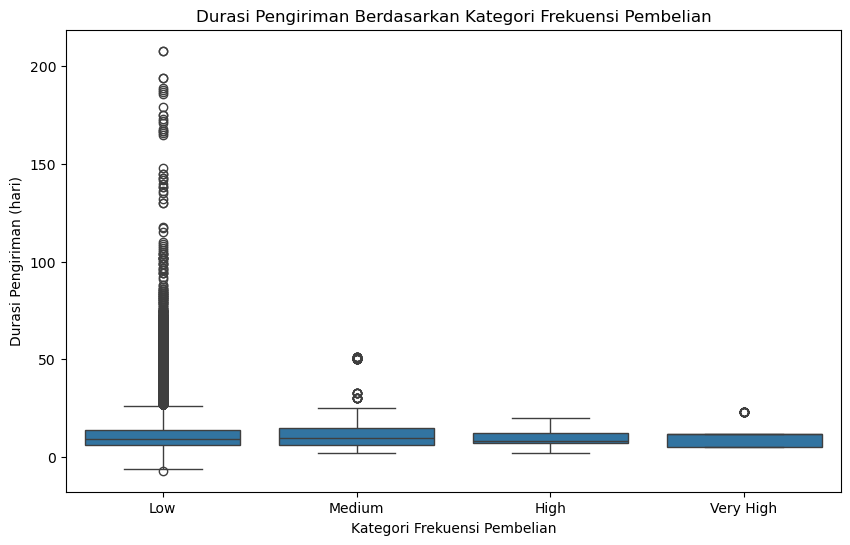

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('all_data.csv')

data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Filter data untuk dua tahun terakhir
two_years_ago = data['order_purchase_timestamp'].max() - pd.DateOffset(years=2)
recent_data = data[data['order_purchase_timestamp'] >= two_years_ago]

# Hitung durasi pengiriman (dari persetujuan hingga diterima) dalam hari
recent_data['delivery_duration'] = (recent_data['order_delivered_customer_date'] - recent_data['order_approved_at']).dt.days

# Hitung frekuensi pembelian per pelanggan
purchase_frequency = recent_data.groupby('customer_id').size()

# Gabungkan frekuensi pembelian ke data
recent_data['purchase_frequency'] = recent_data['customer_id'].map(purchase_frequency)

# Mengelompokkan frekuensi pembelian
recent_data['frequency_category'] = pd.cut(recent_data['purchase_frequency'], bins=[0, 5, 10, 15, 25], labels=["Low", "Medium", "High", "Very High"])

# Plot boxplot untuk melihat distribusi durasi pengiriman berdasarkan kategori frekuensi
plt.figure(figsize=(10, 6))
sns.boxplot(data=recent_data, x='frequency_category', y='delivery_duration')
plt.title("Durasi Pengiriman Berdasarkan Kategori Frekuensi Pembelian")
plt.xlabel("Kategori Frekuensi Pembelian")
plt.ylabel("Durasi Pengiriman (hari)")
plt.show()



- Pelanggan dengan frekuensi pembelian rendah cenderung memiliki durasi pengiriman yang jauh lebih tinggi dibandingkan dengan kategori lain.
- Pada kategori frekuensi pembelian yang lebih tinggi, durasi pengiriman cenderung lebih konsisten dan rata-rata lebih rendah dibandingkan kategori Low.
- Hal ini menunjukkan pelanggan yang sering membeli (Medium hingga Very High) mengalami pengalaman pengiriman yang lebih cepat dan lebih konsisten. Hal ini dapat menjadi indikasi adanya prioritas atau efisiensi pengiriman yang lebih baik untuk pelanggan dengan frekuensi pembelian tinggi.
- pola ini menunjukkan bahwa ada hubungan antara frekuensi pembelian dan durasi pengiriman, di mana pelanggan yang lebih sering membeli cenderung mendapatkan durasi pengiriman yang lebih cepat dan stabil.

pengaruh metode pembayaran dengan kecepatan pengiriman pesanan

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('all_data.csv') 
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Filter data untuk satu tahun terakhir
one_year_ago = data['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
recent_data = data[data['order_purchase_timestamp'] >= one_year_ago]

# Hitung durasi pengiriman (dari persetujuan hingga diterima) dalam hari
recent_data = recent_data.copy()  
recent_data['delivery_duration'] = (recent_data['order_delivered_customer_date'] - recent_data['order_approved_at']).dt.days

payment_delivery_duration = recent_data.groupby('payment_type')['delivery_duration'].mean().reset_index()

print(payment_delivery_duration)


  payment_type  delivery_duration
0       boleto          11.426856
1  credit_card          11.614052
2   debit_card           9.941275
3      voucher          11.774667


Terdapat perbedaan durasi pengiriman antara metode pembayaran cukup kecil, tetapi debit card tampak sedikit lebih cepat dibandingkan metode pembayaran lainnya

analisis lebih lajut

In [101]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('all_data.csv') 
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Filter data untuk satu tahun terakhir
one_year_ago = data['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
recent_data = data[data['order_purchase_timestamp'] >= one_year_ago]

# Hitung durasi pengiriman (dari persetujuan hingga diterima) dalam hari
recent_data['delivery_duration'] = (recent_data['order_delivered_customer_date'] - recent_data['order_approved_at']).dt.days

# Uji normalitas (Shapiro-Wilk) untuk setiap jenis pembayaran
payment_types = recent_data['payment_type'].unique()
normality_results = {}

for payment_type in payment_types:
    subset = recent_data[recent_data['payment_type'] == payment_type]['delivery_duration']
    stat, p_value = stats.shapiro(subset)
    normality_results[payment_type] = p_value

print("Hasil Uji Normalitas (Shapiro-Wilk):")
for payment_type, p_value in normality_results.items():
    print(f"{payment_type}: p-value = {p_value:.3f}")

# Uji homoskedastisitas (Levene's Test) untuk variansi antar grup
stat, p_value_levene = stats.levene(*[recent_data[recent_data['payment_type'] == pt]['delivery_duration'] for pt in payment_types])

print(f"\nHasil Uji Homoskedastisitas (Levene's Test): p-value = {p_value_levene:.3f}")

# uji ANOVA, nb: Jika normalitas dan homoskedastisitas terpenuhi
if all(p_value > 0.05 for p_value in normality_results.values()) and p_value_levene > 0.05:
    print("\nUji ANOVA:")
    stat, p_value_anova = stats.f_oneway(*[recent_data[recent_data['payment_type'] == pt]['delivery_duration'] for pt in payment_types])
    print(f"p-value ANOVA = {p_value_anova:.3f}")
    
    if p_value_anova < 0.05:
        print("Hasil uji ANOVA menunjukkan perbedaan yang signifikan antara jenis pembayaran terhadap durasi pengiriman.")
    else:
        print("Tidak ada perbedaan yang signifikan antara jenis pembayaran terhadap durasi pengiriman.")
else:
    # uji Kruskal-Wallis nb: Jika normalitas atau homoskedastisitas tidak terpenuhi
    print("\nUji Kruskal-Wallis:")
    stat, p_value_kw = stats.kruskal(*[recent_data[recent_data['payment_type'] == pt]['delivery_duration'] for pt in payment_types])
    print(f"p-value Kruskal-Wallis = {p_value_kw:.3f}")
    
    if p_value_kw < 0.05:
        print("Hasil uji Kruskal-Wallis menunjukkan perbedaan yang signifikan antara jenis pembayaran terhadap durasi pengiriman.")
    else:
        print("Tidak ada perbedaan yang signifikan antara jenis pembayaran terhadap durasi pengiriman.")


Hasil Uji Normalitas (Shapiro-Wilk):
credit_card: p-value = 0.000
voucher: p-value = 0.000
boleto: p-value = 0.000
debit_card: p-value = 0.000

Hasil Uji Homoskedastisitas (Levene's Test): p-value = 0.001

Uji Kruskal-Wallis:
p-value Kruskal-Wallis = 0.000
Hasil uji Kruskal-Wallis menunjukkan perbedaan yang signifikan antara jenis pembayaran terhadap durasi pengiriman.


C:\Users\USER\AppData\Local\Temp\ipykernel_932\3541393774.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_data['delivery_duration'] = (recent_data['order_delivered_customer_date'] - recent_data['order_approved_at']).dt.days
c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51025.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13159.
  res = hypotest_fun_out(*samples, **kwds)


In [105]:
from scipy.stats import kruskal
import scikit_posthocs as sp

# uji Kruskal-Wallis untuk konfirmasi perbedaan
kruskal_result = kruskal(
    recent_data[recent_data['payment_type'] == 'credit_card']['delivery_duration'],
    recent_data[recent_data['payment_type'] == 'boleto']['delivery_duration'],
    recent_data[recent_data['payment_type'] == 'debit_card']['delivery_duration'],
    recent_data[recent_data['payment_type'] == 'voucher']['delivery_duration']
)
print("Kruskal-Wallis test p-value:", kruskal_result.pvalue)

# Dunn's Test untuk analisis post-hoc
dunn_test_result = sp.posthoc_dunn(recent_data, val_col='delivery_duration', group_col='payment_type', p_adjust='bonferroni')
print(dunn_test_result)


Kruskal-Wallis test p-value: 6.566057688851455e-15
                   boleto   credit_card    debit_card       voucher
boleto       1.000000e+00  1.000000e+00  9.931325e-11  1.177019e-03
credit_card  1.000000e+00  1.000000e+00  9.155601e-13  5.338264e-03
debit_card   9.931325e-11  9.155601e-13  1.000000e+00  1.458646e-15
voucher      1.177019e-03  5.338264e-03  1.458646e-15  1.000000e+00


Metode pembayaran 'debit_card' menunjukkan perbedaan yang signifikan dalam durasi pengiriman dibandingkan dengan metode lainnya, dengan pengiriman yang umumnya lebih cepat.

menghitung persentase pesanan yang dikirim tepat waktu dalam setahun terakhir

In [106]:
import pandas as pd

# Memuat data
data = pd.read_csv('all_data.csv')  # Sesuaikan nama file Anda
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])

# Filter data untuk satu tahun terakhir
one_year_ago = data['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
recent_data = data[data['order_purchase_timestamp'] >= one_year_ago]

# Hitung jumlah pesanan yang dikirim tepat waktu
on_time_deliveries = recent_data[recent_data['order_delivered_customer_date'] <= recent_data['order_estimated_delivery_date']]
on_time_percentage = (len(on_time_deliveries) / len(recent_data)) * 100

print(f"Persentase pesanan yang dikirim tepat waktu dalam setahun terakhir: {on_time_percentage:.2f}%")


Persentase pesanan yang dikirim tepat waktu dalam setahun terakhir: 90.89%


Perbedaan dalam nilai rata-rata pembayaran berdasarkan metode pembayaran

In [3]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('all_data.csv') 

# uji Kruskal-Wallis untuk perbedaan nilai pembayaran berdasarkan metode pembayaran
kruskal_result = kruskal(
    *[data[data['payment_type'] == payment]['payment_value'] for payment in data['payment_type'].unique()]
)

print(f"Hasil Uji Kruskal-Wallis: p-value = {kruskal_result.pvalue:.4f}")
if kruskal_result.pvalue < 0.05:
    print("Ada perbedaan signifikan dalam nilai rata-rata pembayaran berdasarkan metode pembayaran.")
else:
    print("Tidak ada perbedaan signifikan dalam nilai rata-rata pembayaran berdasarkan metode pembayaran.")


Hasil Uji Kruskal-Wallis: p-value = 0.0000
Ada perbedaan signifikan dalam nilai rata-rata pembayaran berdasarkan metode pembayaran.


Rata-rata waktu pengiriman dari tanggal persetujuan pesanan hingga pesanan diterima pelanggan

In [5]:
import pandas as pd

data = pd.read_csv('all_data.csv')

data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])

# Hitung durasi pengiriman dalam hari
data['delivery_duration'] = (data['order_delivered_customer_date'] - data['order_approved_at']).dt.days

# Hitung rata-rata waktu pengiriman
average_delivery_time = data['delivery_duration'].mean()
print(f"Rata-rata waktu pengiriman dari tanggal persetujuan hingga diterima pelanggan adalah {average_delivery_time:.2f} hari.")


Rata-rata waktu pengiriman dari tanggal persetujuan hingga diterima pelanggan adalah 11.49 hari.


**Insight:**
- Pembayaran dengan credit card adalah yang paling sering digunakan dengan total 65785 transaksi berhasil
- Mayoritas pesanan dalam dataset berhasil diselesaikan dengan status "delivered"
- Tidak terdapat hubungan yang signifikan antara metode pembayaran dan status pesanan.
- Rata-rata waktu pengiriman aktual terjadi 11,48 hari lebih cepat dari estimasi pengiriman yang telah ditetapkan.
- Tidak ada hubungan linear yang signifikan antara frekuensi pembelian dan durasi pengiriman
- Hasil uji Kruskal-Wallis menunjukkan terdapat perbedaan yang signifikan antara jenis pembayaran terhadap durasi pengiriman. 
- Metode pembayaran 'debit_card' menunjukkan perbedaan yang signifikan dalam durasi pengiriman dibandingkan dengan metode lainnya, dengan pengiriman yang umumnya lebih cepat.
- 90,89% pesanan dikirim tepat waktu dalam setahun terakhir
- Ada perbedaan signifikan dalam nilai rata-rata pembayaran berdasarkan metode pembayaran.
- Rata-rata waktu pengiriman dari tanggal persetujuan hingga diterima pelanggan adalah 11.49 hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran mana yang paling sering digunakan oleh pelanggan?

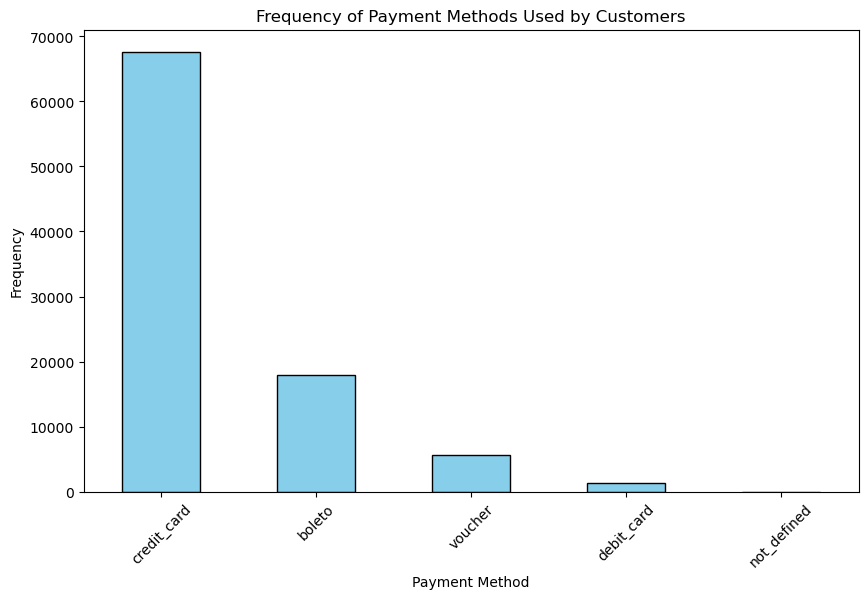

In [ ]:
import matplotlib.pyplot as plt

payment_counts = payments_df['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Payment Methods Used by Customers')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Metode pembayaran yang paling sering digunakan oleh pelanggan adalah credit_card, metode pembayaran kedua yang paling sering digunakan boleto, metode pembayaran ketiga adalah Voucher

### Pertanyaan 2: Apakah ada hubungan antara metode pembayaran dan status pesanan?

order_status  canceled  delivered
payment_type                     
boleto               0      16507
credit_card          3      62563
debit_card           0       1322
voucher              0       5122


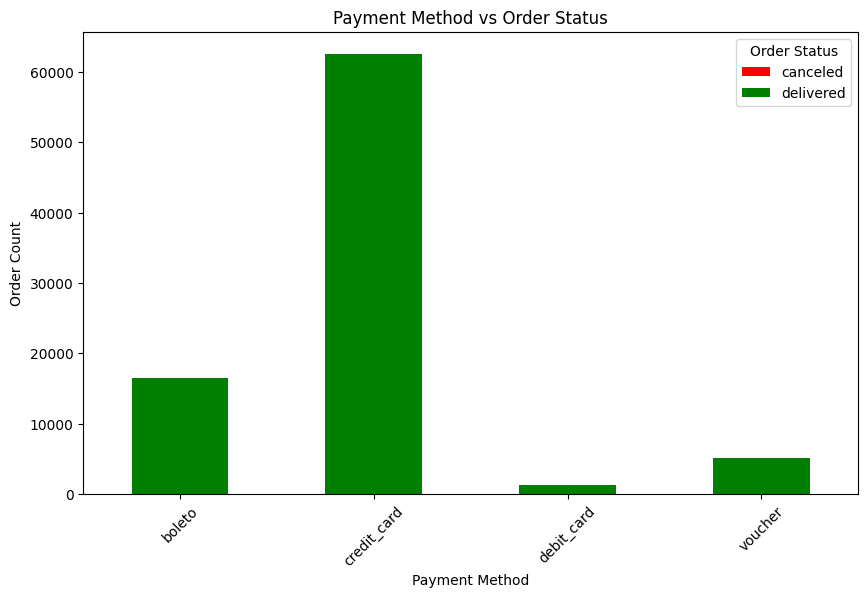

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.merge(orders_df, payments_df, on='order_id', how='inner')

status_counts = pd.crosstab(merged_df['payment_type'], merged_df['order_status'])

print(status_counts)

status_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Payment Method vs Order Status')
plt.xlabel('Payment Method')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.legend(title='Order Status')
plt.show()


Tidak ada hubungan yang signifikan antara metode pembayaran dan status pembatalan pesanan, karena sebagian besar pesanan berhasil dikirim Hanya metode credit card yang memiliki pembatalan pesanan, tetapi jumlahnya sangat kecil (hanya 3 pesanan).

### Pertanyaan 3: Bagaimana rata-rata antara estimasi waktu pengiriman dan waktu aktual pengiriman dalam enam bulan terakhir?

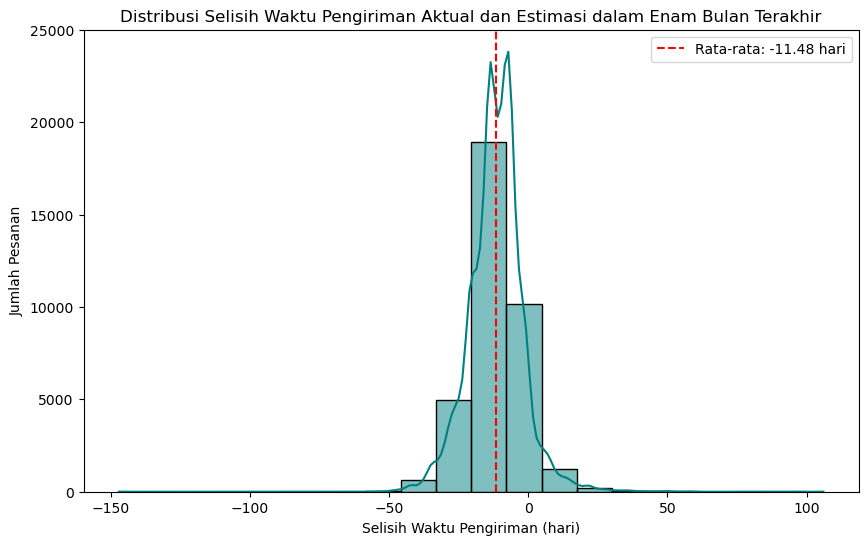

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(recent_data['delivery_time_diff'], bins=20, kde=True, color='teal')
plt.title('Distribusi Selisih Waktu Pengiriman Aktual dan Estimasi dalam Enam Bulan Terakhir')
plt.xlabel('Selisih Waktu Pengiriman (hari)')
plt.ylabel('Jumlah Pesanan')
plt.axvline(average_diff, color='red', linestyle='--', label=f'Rata-rata: {average_diff:.2f} hari')
plt.legend()
plt.show()

- Terdapat rata-rata selisih waktu pengiriman sekitar -11,48 hari (garis putus-putus merah), menunjukkan bahwa waktu pengiriman aktual rata-rata lebih cepat sekitar 11,48 hari daripada estimasi yang diberikan. Hal ini menunjukkan bahwa estimasi pengiriman umumnya cenderung memberikan waktu yang lebih lama daripada waktu aktual pengiriman.
- Sebagian besar data berada di sekitar selisih waktu 0 hingga -20 hari, dengan puncak distribusi di area sekitar -10 hari. Ada banyak pesanan yang dikirim lebih cepat dari estimasi, meskipun ada beberapa pesanan yang pengirimannya lebih lambat dari estimasi (sisi positif).

### Pertanyaan 4: Bagaimana frekuensi pembelian pelanggan dalam dua tahun terakhir berhubungan dengan waktu pengiriman (dari persetujuan hingga diterima), dan apakah pola ini memengaruhi loyalitas pelanggan?

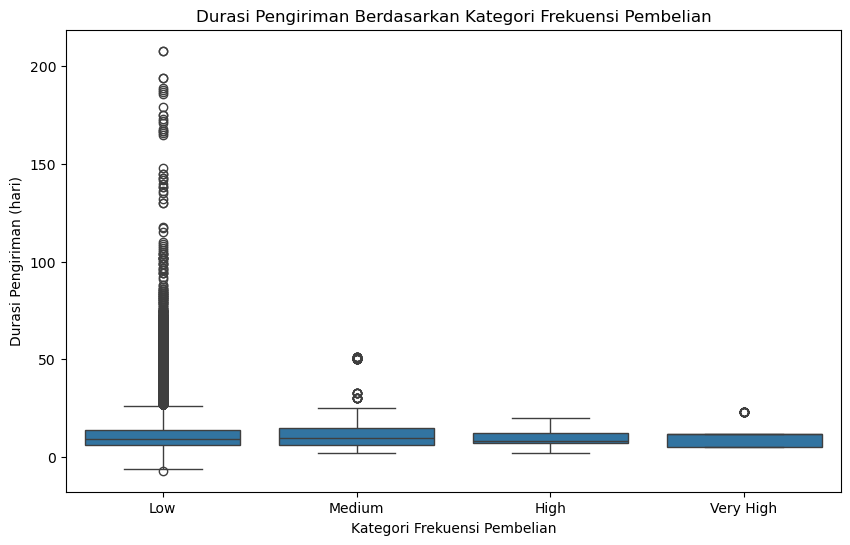

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('all_data.csv')

data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Filter data untuk dua tahun terakhir
two_years_ago = data['order_purchase_timestamp'].max() - pd.DateOffset(years=2)
recent_data = data[data['order_purchase_timestamp'] >= two_years_ago]

# Hitung durasi pengiriman (dari persetujuan hingga diterima) dalam hari
recent_data['delivery_duration'] = (recent_data['order_delivered_customer_date'] - recent_data['order_approved_at']).dt.days

# Hitung frekuensi pembelian per pelanggan
purchase_frequency = recent_data.groupby('customer_id').size()

# Gabungkan frekuensi pembelian ke data
recent_data['purchase_frequency'] = recent_data['customer_id'].map(purchase_frequency)

# Mengelompokkan frekuensi pembelian
recent_data['frequency_category'] = pd.cut(recent_data['purchase_frequency'], bins=[0, 5, 10, 15, 25], labels=["Low", "Medium", "High", "Very High"])

# Plot boxplot untuk melihat distribusi durasi pengiriman berdasarkan kategori frekuensi
plt.figure(figsize=(10, 6))
sns.boxplot(data=recent_data, x='frequency_category', y='delivery_duration')
plt.title("Durasi Pengiriman Berdasarkan Kategori Frekuensi Pembelian")
plt.xlabel("Kategori Frekuensi Pembelian")
plt.ylabel("Durasi Pengiriman (hari)")
plt.show()



- Pelanggan dengan frekuensi pembelian rendah cenderung memiliki durasi pengiriman yang jauh lebih tinggi dibandingkan dengan kategori lain.
- Pada kategori frekuensi pembelian yang lebih tinggi, durasi pengiriman cenderung lebih konsisten dan rata-rata lebih rendah dibandingkan kategori Low.
- Hal ini menunjukkan pelanggan yang sering membeli (Medium hingga Very High) mengalami pengalaman pengiriman yang lebih cepat dan lebih konsisten. Hal ini dapat menjadi indikasi adanya prioritas atau efisiensi pengiriman yang lebih baik untuk pelanggan dengan frekuensi pembelian tinggi.
- pola ini menunjukkan bahwa ada hubungan antara frekuensi pembelian dan durasi pengiriman, di mana pelanggan yang lebih sering membeli cenderung mendapatkan durasi pengiriman yang lebih cepat dan stabil.

### Pertanyaan 5: Apakah jenis pembayaran tertentu berpengaruh pada kecepatan pengiriman pesanan, dihitung dari tanggal persetujuan hingga diterima oleh pelanggan dalam satu tahun terakhir?

C:\Users\USER\AppData\Local\Temp\ipykernel_932\3639709426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='delivery_duration', data=recent_data, palette='Set2')


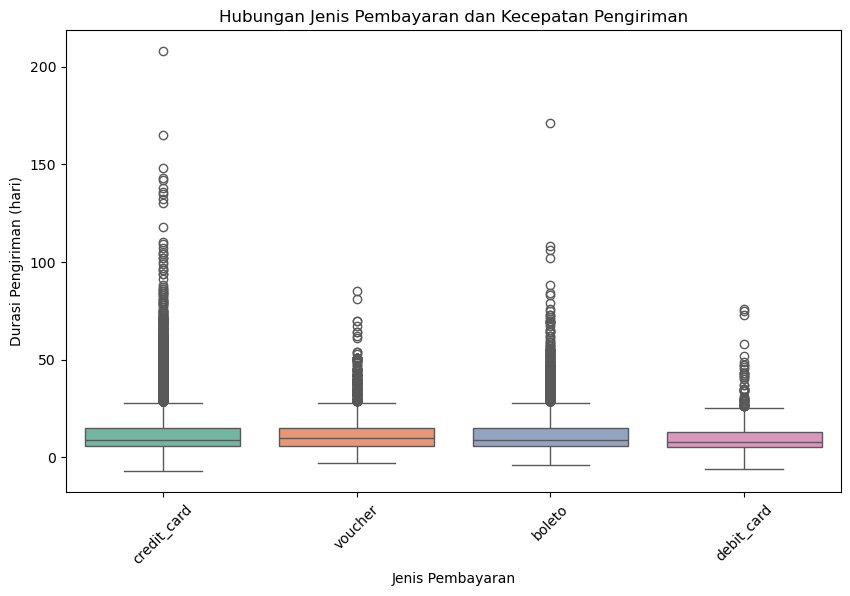

In [98]:
# Visualisasi hubungan jenis pembayaran dan durasi pengiriman
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='delivery_duration', data=recent_data, palette='Set2')
plt.title('Hubungan Jenis Pembayaran dan Kecepatan Pengiriman')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Durasi Pengiriman (hari)')
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_932\1655813684.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='delivery_duration', data=recent_data, palette='Set2')


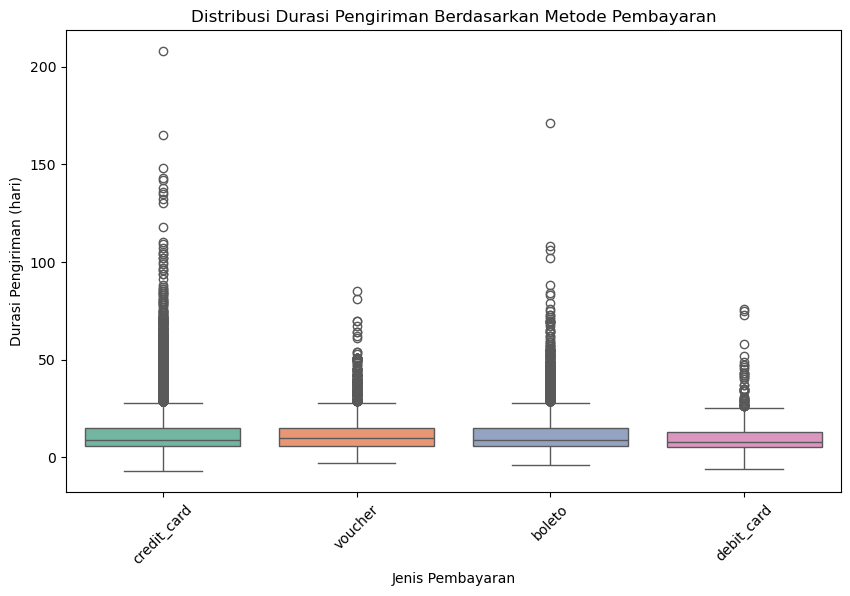

C:\Users\USER\AppData\Local\Temp\ipykernel_932\1655813684.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='delivery_duration', data=payment_delivery_duration, palette='Set3')


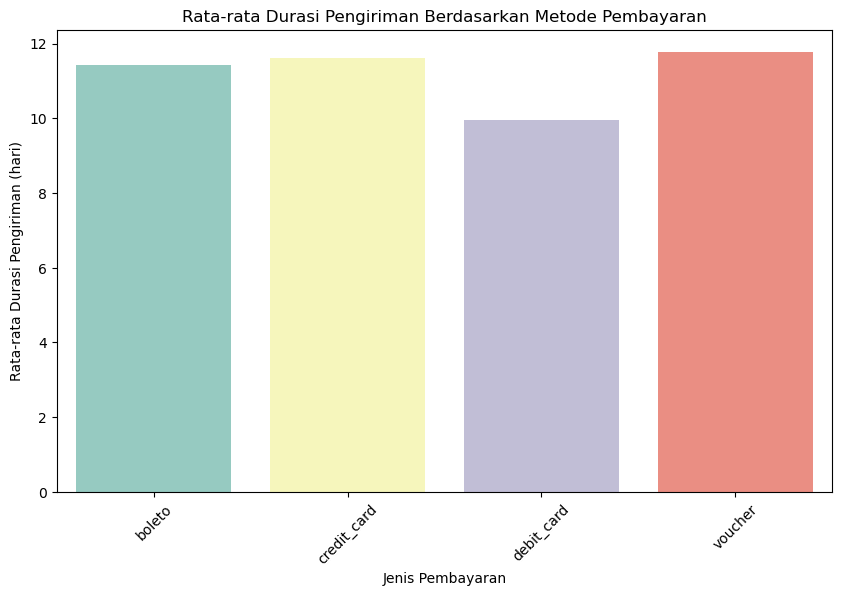

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='delivery_duration', data=recent_data, palette='Set2')
plt.title('Distribusi Durasi Pengiriman Berdasarkan Metode Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Durasi Pengiriman (hari)')
plt.xticks(rotation=45)
plt.show()

payment_delivery_duration = recent_data.groupby('payment_type')['delivery_duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='delivery_duration', data=payment_delivery_duration, palette='Set3')
plt.title('Rata-rata Durasi Pengiriman Berdasarkan Metode Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Rata-rata Durasi Pengiriman (hari)')
plt.xticks(rotation=45)
plt.show()


berdasarkan 3 grafik diatas dapat disimpulkan bahwa metode pembayaran tidak memberikan perbedaan yang signifikan dalam hal kecepatan pengiriman, karena rata-rata durasi pengiriman untuk semua metode hampir sama.

### Pertanyaan 6: Berapa persentase pesanan yang dikirim tepat waktu dalam setahun terakhir?

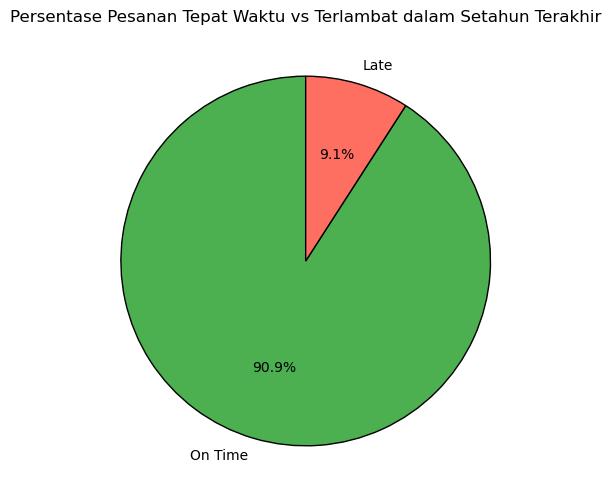

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('all_data.csv')
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])

# Filter data untuk satu tahun terakhir
one_year_ago = data['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
recent_data = data[data['order_purchase_timestamp'] >= one_year_ago]

# Hitung jumlah pesanan yang dikirim tepat waktu dan terlambat
on_time_deliveries = recent_data[recent_data['order_delivered_customer_date'] <= recent_data['order_estimated_delivery_date']]
late_deliveries = recent_data[recent_data['order_delivered_customer_date'] > recent_data['order_estimated_delivery_date']]


labels = ['On Time', 'Late']
sizes = [len(on_time_deliveries), len(late_deliveries)]
colors = ['#4CAF50', '#FF6F61']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Persentase Pesanan Tepat Waktu vs Terlambat dalam Setahun Terakhir')
plt.show()


90,9% pesanan dikirim tepat waktu dalam setahun terakhir

### Pertanyaan 7: Apakah ada perbedaan signifikan dalam nilai rata-rata pembayaran berdasarkan metode pembayaran?

C:\Users\USER\AppData\Local\Temp\ipykernel_1716\2517110284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='payment_value', data=data, palette='Set2')


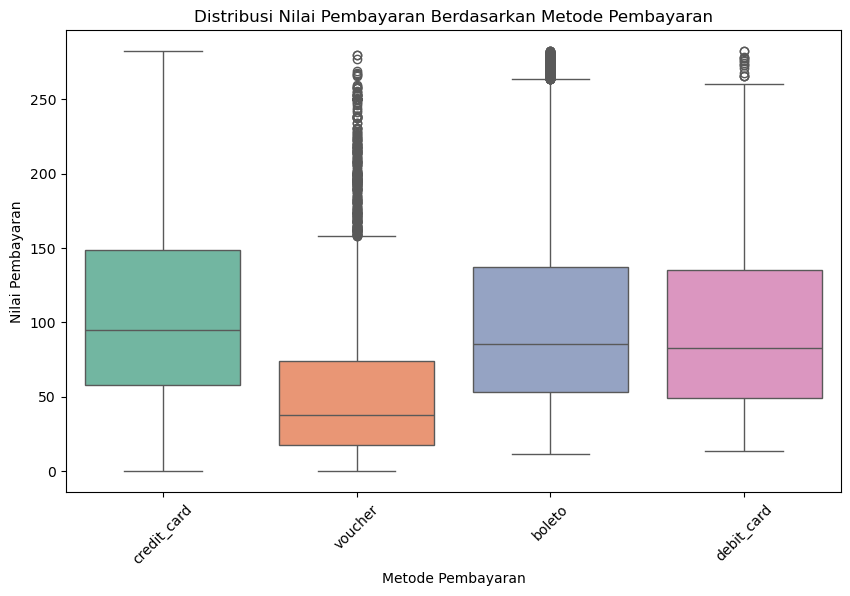

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='payment_value', data=data, palette='Set2')
plt.title('Distribusi Nilai Pembayaran Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Nilai Pembayaran')
plt.xticks(rotation=45)
plt.show()

Metode pembayaran credit card dan debit card memiliki nilai pembayaran yang cenderung lebih tinggi, dengan median yang lebih besar dibandingkan dengan metode voucher.

### Pertanyaan 8: Bagaimana rata-rata waktu pengiriman dari tanggal persetujuan pesanan hingga pesanan diterima pelanggan?

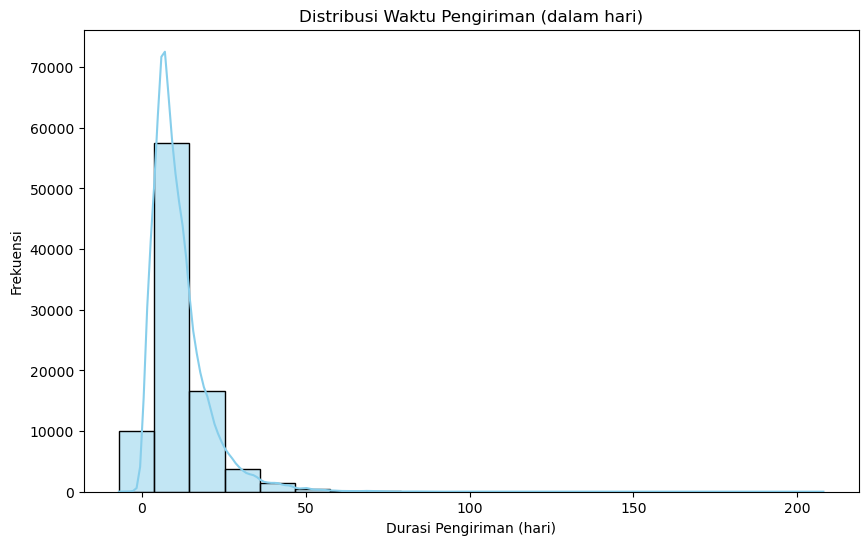

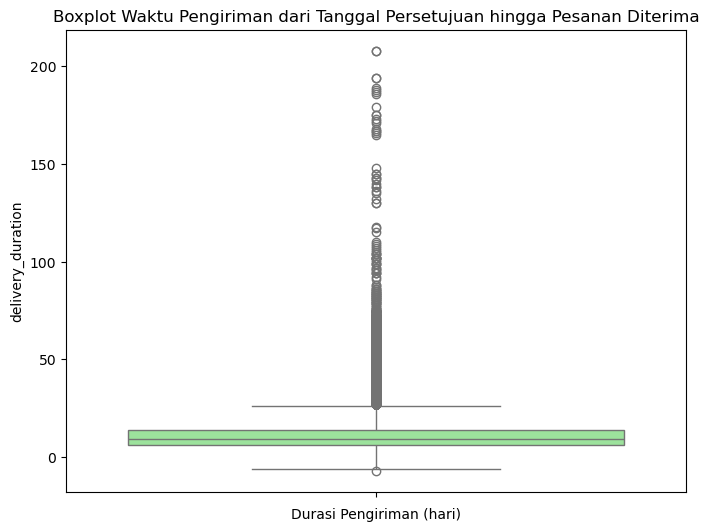

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['delivery_duration'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribusi Waktu Pengiriman (dalam hari)')
plt.xlabel('Durasi Pengiriman (hari)')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data['delivery_duration'].dropna(), color='lightgreen')
plt.title('Boxplot Waktu Pengiriman dari Tanggal Persetujuan hingga Pesanan Diterima')
plt.xlabel('Durasi Pengiriman (hari)')
plt.show()


Rata-rata waktu pengiriman pesanan dari tanggal persetujuan hingga diterima pelanggan kemungkinan besar berada pada rentang yang pendek, meskipun sebagian besar pesanan dikirim dalam waktu yang cepat, ada beberapa pesanan yang mengalami durasi pengiriman yang sangat lama.

**Insight:**
- Metode pembayaran yang paling sering digunakan oleh pelanggan adalah credit_card, metode pembayaran kedua yang paling sering digunakan boleto, metode pembayaran ketiga adalah Voucher
- Tidak ada hubungan yang signifikan antara metode pembayaran dan status pembatalan pesanan, karena sebagian besar pesanan berhasil dikirim Hanya metode credit card yang memiliki pembatalan pesanan, tetapi jumlahnya sangat kecil (hanya 3 pesanan).
- Terdapat rata-rata selisih waktu pengiriman sekitar -11,48 hari (garis putus-putus merah), menunjukkan bahwa waktu pengiriman aktual rata-rata lebih cepat sekitar 11,48 hari daripada estimasi yang diberikan. Hal ini menunjukkan bahwa estimasi pengiriman umumnya cenderung memberikan waktu yang lebih lama daripada waktu aktual pengiriman.
- Sebagian besar data berada di sekitar selisih waktu 0 hingga -20 hari, dengan puncak distribusi di area sekitar -10 hari. Ada banyak pesanan yang dikirim lebih cepat dari estimasi, meskipun ada beberapa pesanan yang pengirimannya lebih lambat dari estimasi (sisi positif).
- Pelanggan dengan frekuensi pembelian rendah cenderung memiliki durasi pengiriman yang jauh lebih tinggi dibandingkan dengan kategori lain.
- Pada kategori frekuensi pembelian yang lebih tinggi, durasi pengiriman cenderung lebih konsisten dan rata-rata lebih rendah dibandingkan kategori Low.
- Hal ini menunjukkan pelanggan yang sering membeli (Medium hingga Very High) mengalami pengalaman pengiriman yang lebih cepat dan lebih konsisten. Hal ini dapat menjadi indikasi adanya prioritas atau efisiensi pengiriman yang lebih baik untuk pelanggan dengan frekuensi pembelian tinggi.
- pola ini menunjukkan bahwa ada hubungan antara frekuensi pembelian dan durasi pengiriman, di mana pelanggan yang lebih sering membeli cenderung mendapatkan durasi pengiriman yang lebih cepat dan stabil.
- berdasarkan 3 grafik diatas dapat disimpulkan bahwa metode pembayaran tidak memberikan perbedaan yang signifikan dalam hal kecepatan pengiriman, karena rata-rata durasi pengiriman untuk semua metode hampir sama.
- 90,9% pesanan dikirim tepat waktu dalam setahun terakhir
- Metode pembayaran credit card dan debit card memiliki nilai pembayaran yang cenderung lebih tinggi, dengan median yang lebih besar dibandingkan dengan metode voucher.
- Rata-rata waktu pengiriman pesanan dari tanggal persetujuan hingga diterima pelanggan kemungkinan besar berada pada rentang yang pendek, meskipun sebagian besar pesanan dikirim dalam waktu yang cepat, ada beberapa pesanan yang mengalami durasi pengiriman yang sangat lama.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Metode pembayaran mana yang paling sering digunakan oleh pelanggan?
Pembayaran dengan credit card adalah yang paling sering digunakan dengan total 65785 transaksi, boleto sebanyak 17427 dan voucher pada urutan ketiga dengan total transaksi 5383.

- Conclution pertanyaan 2: Apakah ada hubungan antara metode pembayaran dan status pesanan?
Untuk mengetahui hubungan antara metode pembayaran dan status pesanan dapat dilakukan uji chi-square. Hasil menunjukkan p-value: 0.5309350456637347 yang artinya tidak terdapat hubungan yang signifikan antara metode pembayaran dan status pesanan. Tidak ada hubungan yang signifikan antara metode pembayaran dan status pembatalan pesanan, karena sebagian besar pesanan berhasil dikirim Hanya metode credit card yang memiliki pembatalan pesanan, tetapi jumlahnya sangat kecil (hanya 3 pesanan).

- Conclution pertanyaan 3: Rata-rata antara estimasi waktu pengiriman dan waktu aktual pengiriman dalam enam bulan terakhir?
Terdapat rata-rata selisih waktu pengiriman sekitar -11,48 hari (garis putus-putus merah), menunjukkan bahwa waktu pengiriman aktual rata-rata lebih cepat sekitar 11,48 hari daripada estimasi yang diberikan. Hal ini menunjukkan bahwa estimasi pengiriman umumnya cenderung memberikan waktu yang lebih lama daripada waktu aktual pengiriman. Sebagian besar data berada di sekitar selisih waktu 0 hingga -20 hari, dengan puncak distribusi di area sekitar -10 hari. Ada banyak pesanan yang dikirim lebih cepat dari estimasi, meskipun ada beberapa pesanan yang pengirimannya lebih lambat dari estimasi (sisi positif).

- Conclution pertanyaan 4: Bagaimana frekuensi pembelian pelanggan dalam dua tahun terakhir berhubungan dengan waktu pengiriman (dari persetujuan hingga diterima)?
Dari hasil analisis menunjukkan Korelasi antara frekuensi pembelian dan durasi pengiriman: 0.00, yang artinya tidak terdapat hubungan yang signifikan antara metode pembayaran dan status pesanan. Namun saat dilakukan visualisasi terdapat hasil yang berbeda. Grafik menunjukkn, pelanggan dengan frekuensi pembelian rendah cenderung memiliki durasi pengiriman yang jauh lebih tinggi dibandingkan dengan kategori lain.Pada kategori frekuensi pembelian yang lebih tinggi, durasi pengiriman cenderung lebih konsisten dan rata-rata lebih rendah dibandingkan kategori Low.Hal ini menunjukkan pelanggan yang sering membeli (Medium hingga Very High) mengalami pengalaman pengiriman yang lebih cepat dan lebih konsisten. Hal ini dapat menjadi indikasi adanya prioritas atau efisiensi pengiriman yang lebih baik untuk pelanggan dengan frekuensi pembelian tinggi. Pola ini menunjukkan bahwa ada hubungan antara frekuensi pembelian dan durasi pengiriman, di mana pelanggan yang lebih sering membeli cenderung mendapatkan durasi pengiriman yang lebih cepat dan stabil. 

- Conclution pertanyaan 5: Apakah jenis pembayaran tertentu berpengaruh pada kecepatan pengiriman pesanan, dihitung dari tanggal persetujuan hingga diterima oleh pelanggan dalam satu tahun terakhir?
Hasil uji Kruskal-Wallis menunjukkan terdapat perbedaan yang signifikan antara jenis pembayaran terhadap durasi pengiriman. Setelah dilakukan analisis lebih lanjut, metode pembayaran 'debit_card' menunjukkan perbedaan yang signifikan dalam durasi pengiriman dibandingkan dengan metode lainnya, dengan pengiriman yang umumnya lebih cepat.

- Conclution pertanyaan 6: Berapa persentase pesanan yang dikirim tepat waktu dalam setahun terakhir?
90,9% pesanan dikirim tepat waktu dalam setahun terakhir

- Conclution pertanyaan 7: Apakah ada perbedaan signifikan dalam nilai rata-rata pembayaran berdasarkan metode pembayaran?
Ada perbedaan signifikan dalam nilai rata-rata pembayaran berdasarkan metode pembayaran.

- Conclution pertanyaan 8: Bagaimana rata-rata waktu pengiriman dari tanggal persetujuan pesanan hingga pesanan diterima pelanggan?
Rata-rata waktu pengiriman pesanan dari tanggal persetujuan hingga diterima pelanggan kemungkinan besar berada pada rentang yang pendek, meskipun sebagian besar pesanan dikirim dalam waktu yang cepat, ada beberapa pesanan yang mengalami durasi pengiriman yang sangat lama. Rata-rata waktu pengiriman dari tanggal persetujuan hingga diterima pelanggan adalah 11.49 hari.
